### PREDICCIÓN DEL RESULTADO DEL PARTIDO DE LEAGUE OF LEGENDS

Integrantes del grupo:


*   Patricia del Carmen García de Flores

*   Michelle Alexandra Zelada Flores
*   Evelyn Elena Campos Umanzor



Para elk presente trabajo se tomaron los data sets y referenciasde este autor:

[Let's Predict League of Legends Match Score!](https://www.kaggle.com/code/gulsahdemiryurek/let-s-predict-league-of-legends-match-score?select=champion_info.json)

In [4]:
!pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.1 MB/s eta 0:00:00


In [6]:
# Este entorno Python 3 viene con muchas bibliotecas de análisis útiles instaladas.
# Se define mediante la imagen docker kaggle/python: https://github.com/kaggle/docker-python.
# Por ejemplo, aquí hay varios paquetes útiles para cargar.

import numpy as np # ALgebra Lineal
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from plotly import tools
import seaborn as sns
# Los archivos de datos de entrada están disponibles en el directorio «../input/».
# Por ejemplo, al ejecutar esto (haciendo clic en «Ejecutar» o pulsando Mayús+Intro) se mostrará una lista de los archivos del directorio de entrada.
import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("/content/DataInput"))
lol=pd.read_csv("/content/DataInput/games.csv")

# Cualquier resultado que escribas en el directorio actual se guardará como salida.

['champion_info.json', 'summoner_spell_info.json', 'champion_info_2.json', 'games.csv']


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


League of Legends (abreviado LoL) es un videojuego multijugador de arena de batalla en línea desarrollado y publicado por Riot Games para Microsoft Windows y macOS.

En League of Legends, los jugadores asumen el papel de un «invocador» invisible que controla a un «campeón» con habilidades únicas y lucha contra un equipo de otros jugadores o campeones controlados por el ordenador. El objetivo suele ser destruir el «nexo» del equipo contrario, una estructura que se encuentra en el centro de una base protegida por estructuras defensivas, aunque también existen otros modos de juego distintos.

Cada partida de League of Legends es independiente, y todos los campeones comienzan bastante débiles, pero aumentan su fuerza al acumular objetos y experiencia a lo largo del juego.

![](https://cdn.webrazzi.com/uploads/2016/09/league-of-legends.jpg)

En este núcleo, se analizaron las partidas clasificatorias de League of Legends y se desarrolló un algoritmo de clasificación de árbol de decisión para predecir los resultados de las partidas. Para desarrollar este algoritmo:

- Ganador (1 = equipo 1, 2 = equipo 2)

- Primer barón, dragón, torre, sangre, inhibidor y heraldo de la Grieta (1 = equipo 1, 2 = equipo 2, 0 = ninguno)

- Número de torres, inhibidores, barones y dragones destruidos por cada equipo.



* Toda la información se ha obtenido de Wikipedia.

#### Contents:

1. [Juego](#1)
2. [Analisis Datos](#2)
3. [Árbol de decisión con método de búsqueda por cuadrícula](#3)
4. [Predicción](#4)

<a id="1"></a> <br>
**Juego**

Summoner's Rift es el mapa más popular de League of Legends.

En este tipo de mapa, dos equipos de cinco jugadores compiten para destruir un edificio enemigo llamado Nexus, que está protegido por el equipo enemigo y una serie de estructuras defensivas llamadas torretas o torres.

Hay un nexus en cada base enemiga, en lados opuestos del mapa, en las esquinas inferior izquierda y superior derecha.

Estas estructuras crean continuamente personajes débiles no jugables conocidos como súbditos, que avanzan hacia la base enemiga por tres caminos: las líneas superior, central e inferior.

Los jugadores compiten para hacer avanzar estas oleadas de esbirros hacia la base enemiga, lo que les permite destruir las estructuras enemigas y, en última instancia, ganar la partida.

Entre los carriles hay zonas neutrales del mapa conocidas como «la jungla», dispuestas en cuatro cuadrantes. Un río poco profundo divide el mapa entre los equipos, pero en realidad no impide el movimiento; todos los campeones pueden atravesarlo como si fuera tierra firme.

![](http://www.wikizero.biz/index.php?q=aHR0cDovL3VwbG9hZC53aWtpbWVkaWEub3JnL3dpa2lwZWRpYS9jb21tb25zL3RodW1iL2QvZGMvTWFwX29mX01PQkEuc3ZnLzI0MHB4LU1hcF9vZl9NT0JBLnN2Zy5wbmc)

La imagen superior muestra una representación simplificada de Summoner's Rift. Los caminos amarillos son las «líneas» por las que marchan oleadas interminables de tropas conocidas como súbditos; los puntos azules y rojos son las torretas defensivas que protegen las líneas. No aparecen en la imagen las dos torretas que flanquean cada Nexus, el objetivo final del juego, que se encuentran dentro de la base de cada equipo en su esquina. La línea punteada negra es el río que divide los bandos.

Cada equipo desea defender sus propias estructuras y destruir las del equipo contrario. Estas incluyen:

**Torres:** cada carril está protegido por poderosas estructuras defensivas llamadas torretas o torres. Cada equipo tiene un total de 11 torres.

**Inhibidor:** cada carril contiene un inhibidor. El inhibidor de un carril puede ser atacado después de que un equipo haya destruido las tres torretas que protegen su carril.

**Dragones elementales/dragón anciano:** los dragones elementales son poderosos monstruos que se encuentran en la mitad inferior del río. Todos los miembros del equipo que mata al dragón reciben mejoras que duran toda la partida y se acumulan. Los dragones están inspirados en los cuatro elementos, y cada uno de ellos otorga una mejora temática adecuada. Un dragón elemental aleatorio reaparecerá seis minutos después de que se mate al anterior. El dragón anciano reaparece después de que hayan transcurrido 35 minutos en el juego. Cuando se mata, proporciona una mejora más fuerte que un dragón elemental individual, pero es temporal, a diferencia de las recompensas de los dragones anteriores.

**Heraldo de la Grieta:** El Heraldo de la Grieta es un poderoso enemigo que se encuentra en la parte superior del río. Matar al Heraldo de la Grieta permite invocarlo de nuevo como ariete para atacar las torres enemigas.

**Barón Nashor: **el barón Nashor es el enemigo neutral más poderoso y se encuentra en la parte superior del río. Aparecerá tras veinte minutos, sustituyendo al heraldo de la Grieta.

**Nexo: **cada equipo tiene un nexo que solo puede dañarse una vez que se hayan destruido todas las torretas de un carril, el inhibidor de ese carril y las torretas del nexo. La destrucción del nexo del equipo enemigo pone fin a la partida.

In [8]:
data=lol[["winner","firstBlood","firstTower","firstInhibitor","firstBaron","firstDragon","firstRiftHerald","t1_towerKills","t1_inhibitorKills",'t1_baronKills',
       't1_dragonKills','t2_towerKills','t2_inhibitorKills', 't2_baronKills', 't2_dragonKills'
       ]]

In [9]:
data.drop([524,839,867,5325,5340,6472,7408,7430,7570,7711,7874,7900,3858,4031,4467,4551,4646,4696,4897,4907,5002,5027,1241,1347,1452,1712,1962,2681,2799,2837,2960,3010,3093,3234,3325,3534,3634,3659,3747,3806,3848],inplace=True)
data=data.reset_index()
data.drop(["index"],axis=1,inplace=True)

<a id="2"></a> <br>
**ANALISIS DE DATOS**

La siguiente tabla muestra las primeras 5 entradas del conjunto de datos.

In [10]:
data.head()

winner  firstBlood  firstTower  firstInhibitor  firstBaron  firstDragon  \
0       1           2           1               1           1            1   
1       1           1           1               1           0            1   
2       1           2           1               1           1            2   
3       1           1           1               1           1            1   
4       1           2           1               1           1            1   

   firstRiftHerald  t1_towerKills  t1_inhibitorKills  t1_baronKills  \
0                2             11                  1              2   
1                1             10                  4              0   
2                0              8                  1              1   
3                0              9                  2              1   
4                0              9                  2              1   

   t1_dragonKills  t2_towerKills  t2_inhibitorKills  t2_baronKills  \
0               3              5                  0              0   
1               2              2                  0              0   
2               1              2                  0              0   
3               2              0                  0              0   
4               3              3                  0              0   

   t2_dragonKills  
0               1  
1               0  
2               1  
3               0  
4               1

Ahora comprobemos si hay datos faltantes en el conjunto de datos.

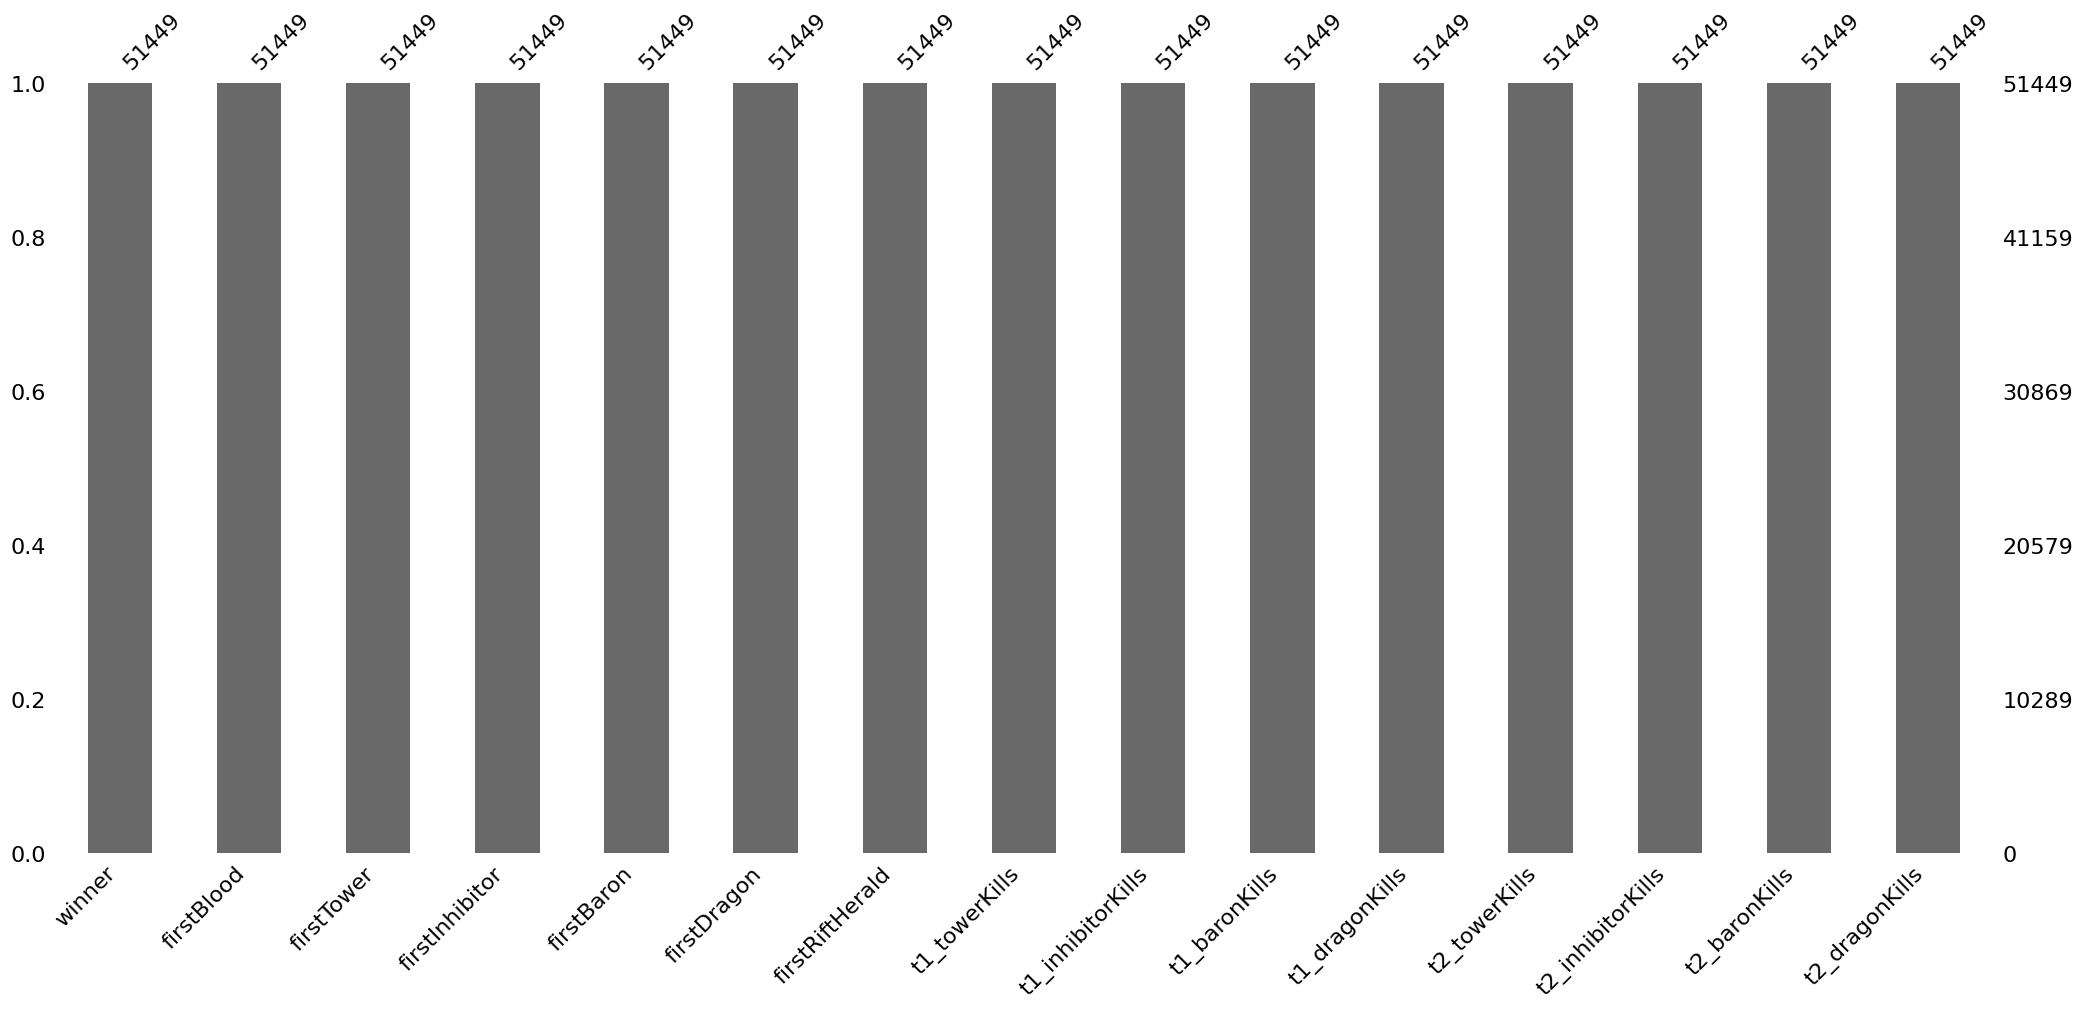

In [11]:
import missingno as msno
msno.bar(data)
plt.show()

In [12]:
first_team=data[data.winner==1]
second_team=data[data.winner==2]

Las siguientes subtramas muestran las probabilidades de diferentes características cuando un equipo gana.

Por ejemplo:

En partidos en los que gana el primer equipo:

- La probabilidad de que el primer equipo consiga la primera sangre es de aproximadamente el 59 %.
- La probabilidad de que el segundo equipo consiga la primera sangre es de aproximadamente el 39 %.
- La probabilidad de que cualquiera de los equipos consiga la primera sangre es de aproximadamente el 0,98 % (rendición temprana).

En partidas en las que gana el segundo equipo:

- La probabilidad de que el primer equipo consiga la primera sangre es de aproximadamente un 41 %.
- La probabilidad de que el segundo equipo consiga la primera sangre es de aproximadamente el 57 %.
- La probabilidad de que cualquiera de los equipos consiga la primera sangre es de aproximadamente el 0,1 % (rendición temprana).

Etc.
Además, vemos que el factor más importante para ganar los partidos es conseguir el **primer inhibidor** o la **primera torre**.

In [13]:
trace1 = go.Histogram(x=first_team.firstBlood, text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="crimson",line=dict(color='black', width=2)),opacity=0.75)

trace2 = go.Histogram(x=second_team.firstBlood,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="blue",line=dict(color='black', width=2)),opacity=0.75)

trace3 = go.Histogram(x=first_team.firstTower,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="grey",line=dict(color='black', width=2)),opacity=0.75)

trace4 = go.Histogram(x=second_team.firstTower,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="yellow",line=dict(color='black', width=2)),opacity=0.75)

trace5 = go.Histogram(x=first_team.firstBaron,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="pink",line=dict(color='black', width=2)),opacity=0.75)

trace6 = go.Histogram(x=second_team.firstBaron,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="green",line=dict(color='black', width=2)),opacity=0.7)

trace7 = go.Histogram(x=first_team.firstInhibitor,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="purple",line=dict(color='black', width=2)),opacity=0.75)

trace8 = go.Histogram(x=second_team.firstInhibitor,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="slateblue",line=dict(color='black', width=2)),opacity=0.7)

trace9 = go.Histogram(x=first_team.firstDragon,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="brown",line=dict(color='black', width=2)),opacity=0.75)

trace10 = go.Histogram(x=second_team.firstDragon,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="red",line=dict(color='black', width=2)),opacity=0.7)

trace11 = go.Histogram(x=first_team.firstRiftHerald,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="orange",line=dict(color='black', width=2)),opacity=0.75)

trace12 = go.Histogram(x=second_team.firstRiftHerald,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="yellowgreen",line=dict(color='black', width=2)),opacity=0.7)

fig = tools.make_subplots(rows=6, cols=2,vertical_spacing=0.1,print_grid=False )

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace5, 3, 1)
fig.append_trace(trace6, 3, 2)
fig.append_trace(trace7, 4, 1)
fig.append_trace(trace8, 4, 2)
fig.append_trace(trace9, 5, 1)
fig.append_trace(trace10, 5, 2)
fig.append_trace(trace11, 6, 1)
fig.append_trace(trace12, 6, 2)
fig['layout'].update( annotations=[dict(showarrow=False,text="Teams",x=0.5,y=-0.1,xref="paper",yref="paper",font=dict(size=15)),dict(showarrow=False, text='Probabilites',x=-0.08,y=0.5,xref="paper",yref="paper",textangle=270,font=dict(size=15)),
                                  dict(showarrow=False,text="First Blood When First Team wins",x=0.13,y=1.03,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Blood When Second Team wins",x=0.88,y=1.03,xref="paper",yref="paper",font=dict(size=10)),
                                   dict(showarrow=False,text="First Tower When First Team wins",x=0.13,y=0.85,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Tower When Second Team wins",x=0.88,y=0.85,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Baron When First Team wins",x=0.13,y=0.65,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Baron When Second Team wins",x=0.88,y=0.65,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Inhibitor When First Team wins",x=0.13,y=0.46,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Inhibitor When Second Team wins",x=0.88,y=0.46,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Dragon When First Team wins",x=0.13,y=0.28,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Dragon When Second Team wins",x=0.88,y=0.28,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Rift Herald When First Team wins",x=0.13,y=0.10,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Rift Herald When Second Team wins",x=0.90,y=0.10,xref="paper",yref="paper",font=dict(size=10))],

                     height=800,font=dict(family="Franklin Gothic", size=10),showlegend=False, bargap=0.4,title="Probabilities of First Blood etc. When a Team Wins",plot_bgcolor="snow" ,bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)')

iplot(fig)


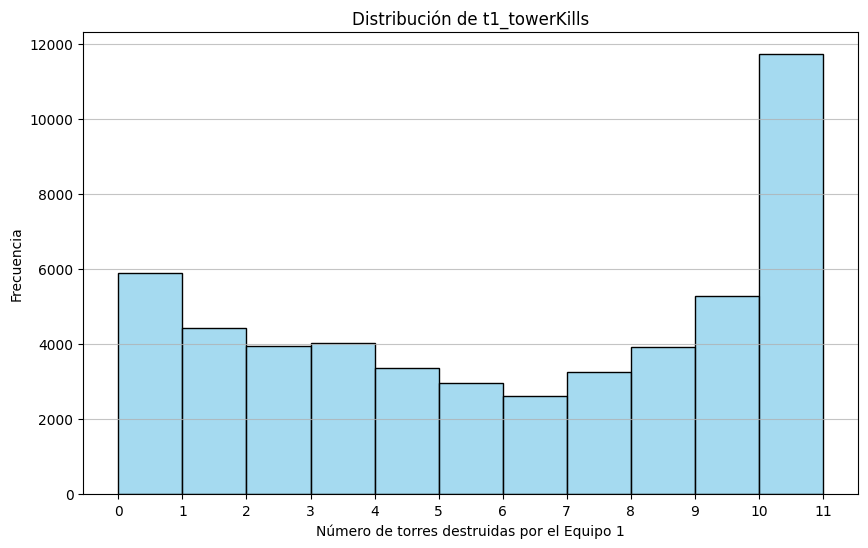

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='t1_towerKills', bins=range(0, 12), kde=False, color='skyblue')
plt.title('Distribución de t1_towerKills')
plt.xlabel('Número de torres destruidas por el Equipo 1')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 12))
plt.grid(axis='y', alpha=0.75)
plt.show()

La siguiente tabla y los subgráficos muestran el número medio de torres, inhibidores, barones y dragones que ha matado cada equipo.

In [15]:
data_new=data[["winner","t1_towerKills","t1_inhibitorKills","t1_baronKills","t1_dragonKills","t2_towerKills","t2_inhibitorKills","t2_baronKills","t2_dragonKills"]]
data_new.groupby("winner").mean()


t1_towerKills  t1_inhibitorKills  t1_baronKills  t1_dragonKills  \
winner                                                                    
1            8.607006           1.830696       0.586188        1.953142   
2            2.729627           0.186086       0.153740        0.809586   

        t2_towerKills  t2_inhibitorKills  t2_baronKills  t2_dragonKills  
winner                                                                   
1            2.558381           0.166270       0.172914        0.804617  
2            8.622831           1.825562       0.662771        2.021092

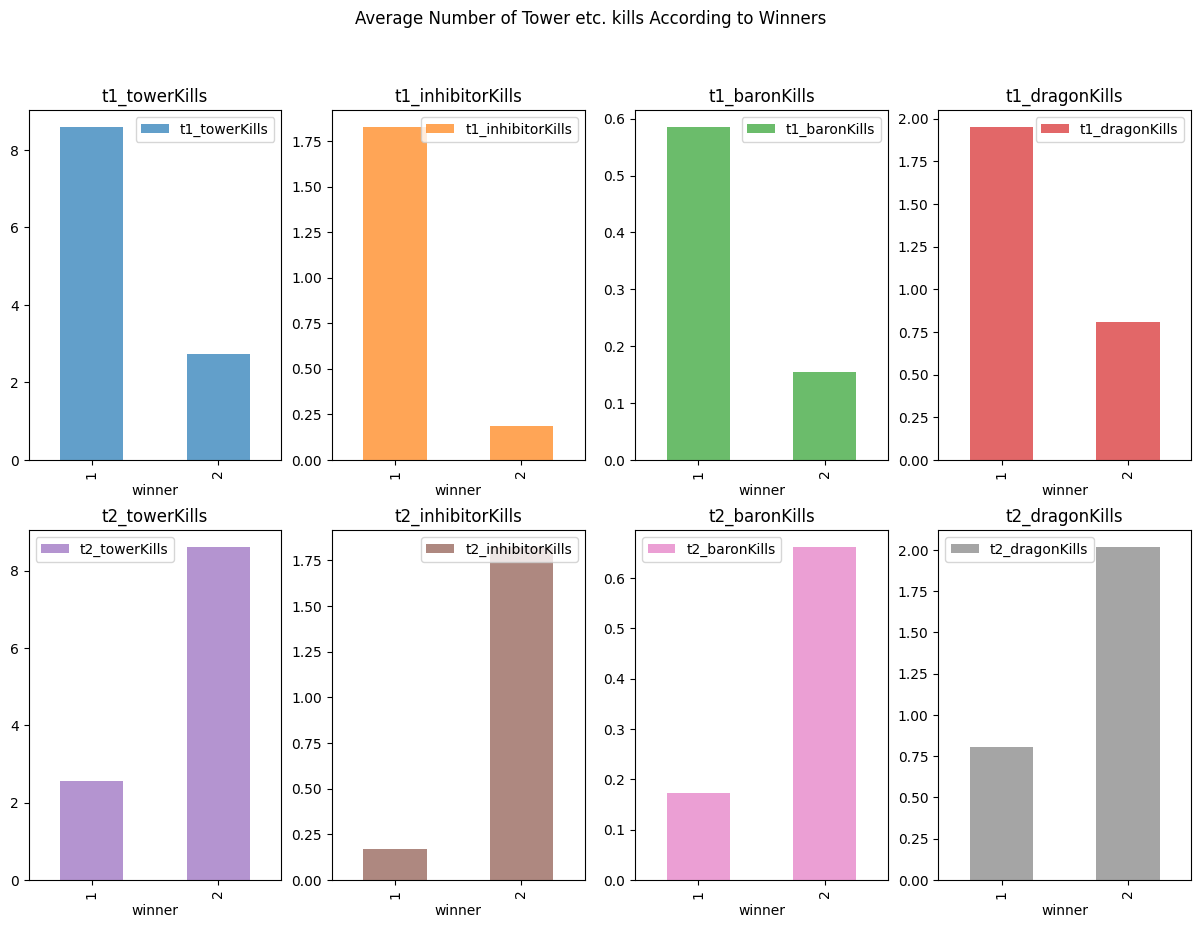

In [16]:
f=data_new.groupby("winner").mean().plot(kind="bar",subplots=True,sharex=False,sharey=False,figsize=(15,10),layout=(2,4),alpha=0.7,title="Average Number of Tower etc. kills According to Winners")
f= sns.set_style("darkgrid")
f=sns.set_context("paper")
plt.show()

In [17]:
y = data["winner"].values
x = data.drop(["winner"],axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

<a id="3"></a> <br>
**Árbol de decisión con método de búsqueda por cuadrícula**

Para desarrollar el mejor modelo, buscamos los mejores parámetros. Para encontrarlos, utilizamos el método de búsqueda por cuadrícula.

In [18]:
criterion=["gini","entropy"]
max_depth=range(1,20,2)
splitter=["best","random"]
dt=DecisionTreeClassifier()
grid_decision_tree=GridSearchCV(estimator=dt,cv=15,param_grid=dict(criterion=criterion,max_depth=max_depth,splitter=splitter))

In [19]:
grid_decision_tree.fit(x_train,y_train)
print("best score: ", grid_decision_tree.best_score_)
print("best param: ", grid_decision_tree.best_params_)

best score:  0.9692897866629647
best param:  {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'}


Y encontramos los mejores parámetros: el parámetro criterio como entropía, la profundidad máxima es 7 y el divisor es el mejor. A continuación, probamos nuestro modelo.

In [20]:
dt2=DecisionTreeClassifier(criterion="entropy",max_depth=7, splitter="best")
dt2.fit(x_train,y_train)
print("score:", dt2.score(x_test,y_test))

score: 0.9662455458373825


Nuestro modelo funciona con una precisión de aproximadamente el 97 %. La siguiente figura muestra el árbol de decisión:

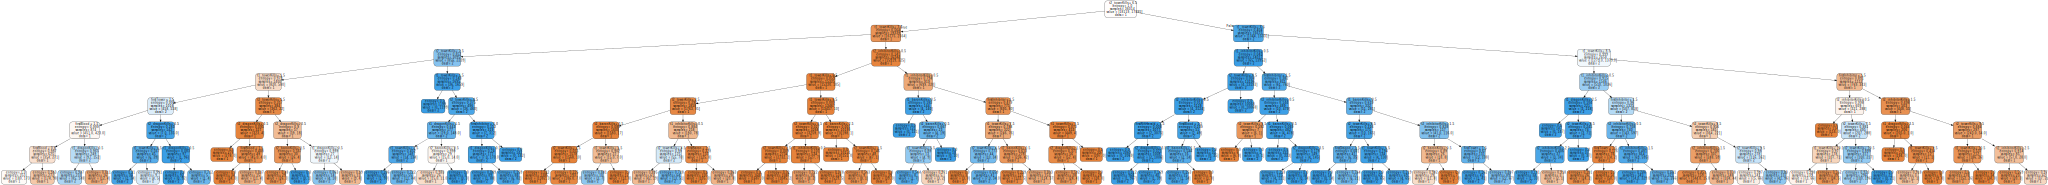

In [21]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt2, out_file=None, feature_names=x.columns,class_names=["1","2"],
                     filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

Para evaluar nuestro modelo, utilicé una matriz de confusión y un informe de clasificación.

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
predicted_values = dt2.predict(x_test)
cm=confusion_matrix(y_test,predicted_values)
cr=classification_report(y_test,predicted_values)
print('Classification report : \n',cr)

Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.97      0.97      7917
           2       0.97      0.96      0.97      7518

    accuracy                           0.97     15435
   macro avg       0.97      0.97      0.97     15435
weighted avg       0.97      0.97      0.97     15435



Text(0.5, 22.71666666666666, 'y_head')

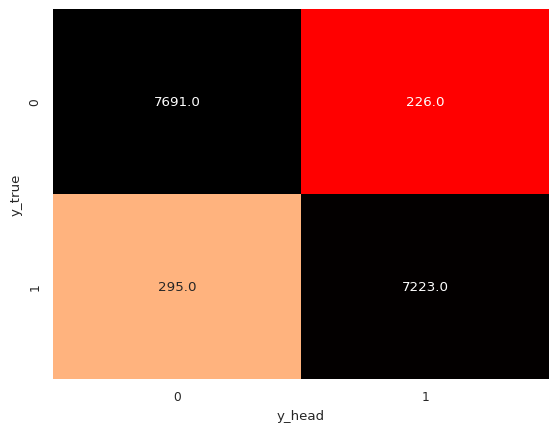

In [23]:
g1 = sns.heatmap(cm,annot=True,fmt=".1f",cmap="flag",cbar=False)
g1.set_ylabel('y_true')
g1.set_xlabel('y_head')

Como se ve en la matriz de confusión, nuestros modelos identificaron 226 partidos en los que el primer equipo ganó como segundo equipo. También identificaron 295 partidos en los que el segundo equipo ganó como primer equipo. Ahora vamos a implementarlo.

<a id="4"></a> <br>
**¡INTENTÉMOSLO!**

Digamos que:

El primer equipo consiguió la primera sangre, la primera torre, el primer barón, el primer dragón y el primer heraldo de la grieta, y el segundo equipo solo consiguió el primer inhibidor. Y

el número de torres, inhibidores, barones y dragones eliminados por el equipo 1 es 10, 2, 1 y 4 respectivamente, y

el número de torres, inhibidores, barones y dragones eliminados por el equipo 2 es 7, 2, 1 y 1 respectivamente.


In [24]:
scenario={"feature":["first_blood","first_tower","first_inhibitor","first_Baron","first_Dragon","first_RiftHerald",
"t1_tower","t1_inhibitor","t1_baron","t1_dragon","t2_tower","t2_inhibitor","t2_baron","t2_dragon"],
         "value":[1,1,2,1,1,1,10,2,1,4,7,2,1,1]}
scen=pd.DataFrame(scenario)
scen.T

0            1                2            3             4   \
feature  first_blood  first_tower  first_inhibitor  first_Baron  first_Dragon   
value              1            1                2            1             1   

                       5         6             7         8          9   \
feature  first_RiftHerald  t1_tower  t1_inhibitor  t1_baron  t1_dragon   
value                   1        10             2         1          4   

               10            11        12         13  
feature  t2_tower  t2_inhibitor  t2_baron  t2_dragon  
value           7             2         1          1

In [25]:
x1=[[1,1,2,1,1,1,10,2,1,4,7,2,1,1]]
c=dt2.predict_proba(x1).reshape(-1,1)
print("winner is :" , dt2.predict(x1) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100)  )

winner is : [1]
first team win probability is %  [np.float64(85.39325842696628)] 
second team win probability is %: [np.float64(14.606741573033707)]


Nuestro modelo dice que el ganador será el Primer Equipo con una probabilidad del 85 %.

¿QUÉ OCURRIÓ EN LA SITUACIÓN DE RENDICIÓN PREMATURA?

Además, al comienzo de la partida de LOL, los jugadores pueden rendirse temprano como resultado de estar ausentes (AFK). En este caso, si no se derrama la primera sangre, nuestro modelo predice el resultado del partido como 51 % - 49 %.

In [26]:
x2=[[0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
c=dt2.predict_proba(x2).reshape(-1,1)
print("winner is :" , dt2.predict(x2) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100)  )

winner is : [1]
first team win probability is %  [np.float64(50.991501416430594)] 
second team win probability is %: [np.float64(49.008498583569406)]


In [27]:
# Vamos a crear un nuevo escenario donde el segundo equipo tiene una ventaja
x3=[[2, 2, 1, 2, 2, 2, 7, 1, 1, 1, 10, 4, 2, 3]] # Ejemplo de escenario favorable para el equipo 2

c2 = dt2.predict_proba(x3).reshape(-1, 1)
print("Según este escenario, el ganador es:", dt2.predict(x3))
print("La probabilidad de que gane el primer equipo es %:", list(c2[0]*100))
print("La probabilidad de que gane el segundo equipo es %:", list(c2[1]*100))

Según este escenario, el ganador es: [2]
La probabilidad de que gane el primer equipo es %: [np.float64(4.081632653061225)]
La probabilidad de que gane el segundo equipo es %: [np.float64(95.91836734693877)]
